In [8]:
%matplotlib notebook
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests as rp
import gmaps
from config import gkey
import scipy.stats as stats

import geopy.distance

In [9]:
distance_csv = "CSV_files\Airport_distance.csv"
sighting_csv= "CSV_files\Duplicate-data.csv"
airport_csv = "CSV_files\Airport-data.csv"

In [10]:
distance_data = pd.read_csv(distance_csv)
sighting_data = pd.read_csv(sighting_csv)
flights_data = pd.read_csv(airport_csv)

In [11]:
distance_data.head()


,Unnamed: 0,index,Unnamed: 0.1,lat,lng,city,state,date,year,month,Airport Name,Lat Airport,Lng Airport,Distance
0,0,1,1,51.266667,-80.650000,Moosonee (Canada),ON,2007-01-18T17:30:00.000Z,2007,1,Moosonee Airport,51.289703,-80.612741,3.650675
1,1,2,2,52.923989,-82.428349,Attawapiskat (Canada),ON,2012-10-08T21:45:00.000Z,2012,10,Attawapiskat Airport,52.926554,-82.430475,0.319252
2,2,3,3,50.178516,-86.713331,Northern Canada,ON,1995-02-06T01:00:00.000Z,1995,2,Hutchison Lake Waterdrome,49.784780,-86.940019,46.715300
3,3,4,4,48.773899,-91.638603,Atikokan (Canada),ON,2010-09-28T22:00:00.000Z,2010,9,Atikokan Airport,48.771296,-91.637361,0.303492
4,4,5,5,48.716220,-86.375895,Marathon,ON,2014-06-14T22:00:00.000Z,2014,6,Marathon Airport,48.759111,-86.348956,5.164921


In [12]:
rounded_vals = distance_data['Distance'].round(0)

In [39]:
distance_group = distance_data.groupby('month')
bins = [0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels =["Jan","Feb","March","April","May","June","July","Aug","Sept","Oct","Nov","Dec"]
distance_data['MonthCount'] = pd.cut(distance_data['month'], bins,labels=labels)
counts = distance_data['MonthCount'].value_counts()
counts

Aug      82
June     58
July     53
Sept     42
Oct      39
Nov      25
Dec      24
Jan      24
April    19
May      17
March    16
Feb      13
Name: MonthCount, dtype: int64

In [40]:
#new dict to sort by month
d = {"Jan" : 24, "Feb": 13, "Mar" : 16, "Apr" : 19, "May" :17, "June" :58, "July":53, "Aug": 82, "Sept":42, "Oct":39, "Nov" :25, "Dec" :24 }

<IPython.core.display.Javascript object>


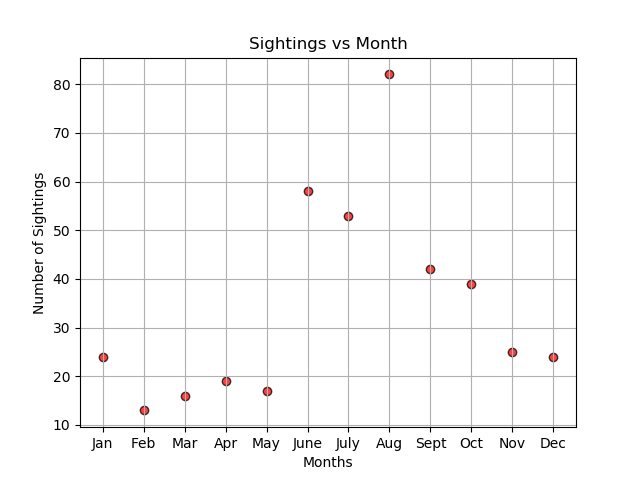

In [41]:
#plot new binned information

# Plot
plt.scatter(d.keys(), d.values(), marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)
plt.title('Sightings vs Month')
plt.xlabel('Months')
plt.ylabel('Number of Sightings')
plt.grid()
plt.show()

In [42]:
plt.savefig("Figures/FurtherExploration.png")